In [175]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [238]:
y   = load('../../March2021/Observation_models/ObsY.joblib')
#predy = load('Dec2018-Jan2019-Y.joblib')
predy = load('Dec1980-Jan2020-Y.joblib')

In [216]:
def getSeasonalCycle( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=dArray.groupby('time.dayofyear').mean()
    
    
    
    return fg

In [217]:
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
OTs

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


<xarray.DataArray 'fogdata' (dayofyear: 62)>
array([0.14564103, 0.13641026, 0.15487179, 0.1374359 , 0.16307692,
       0.20410256, 0.21025641, 0.23282051, 0.20820513, 0.20512821,
       0.24410256, 0.23897436, 0.24820513, 0.23384615, 0.24307692,
       0.29846154, 0.32307692, 0.33128205, 0.31794872, 0.30769231,
       0.31179487, 0.35076923, 0.35487179, 0.34666667, 0.35897436,
       0.37435897, 0.37641026, 0.38564103, 0.39076923, 0.37538462,
       0.40923077, 0.42461538, 0.43179487, 0.42358974, 0.4       ,
       0.42153846, 0.42871795, 0.40717949, 0.40615385, 0.36717949,
       0.36512821, 0.36410256, 0.35692308, 0.33641026, 0.29435897,
       0.30666667, 0.31692308, 0.31384615, 0.32820513, 0.30153846,
       0.28512821, 0.28102564, 0.27487179, 0.23692308, 0.24102564,
       0.22871795, 0.23076923, 0.25435897, 0.23897436, 0.23487179,
       0.18666667, 0.12827586])
Coordinates:
  * dayofyear  (dayofyear) int64 336 337 338 339 340 341 ... 27 28 29 30 31 335

In [240]:
with open('IMD_RawData.txt') as f:
    lines = f.readlines()
    index=[]
    for x in lines:
        index.append(x.split(' ')[0])
f.close()

In [241]:
int(lines[1][0:5])

lines[0]

'INDEX YEAR MN DT ..MAX ..MIN AW ..R/F .EVP DRNRF .SSH TS N FFF D TOCSQ DU RA DZ SN SL HA TH DS FG GA T G DUR T G DUR T G DUR T G DUR\n'

In [242]:
data=[]
for x in lines[1:]:
    #print(x)
    data.append([int(x[0:5]),int(x[6:10]),int(x[11:13]),int(x[14:16]),int(x[95:96])])
#print(data)    
data
IMDdf = pd.DataFrame(data,columns =['Station','Year','Month','Day','FogFlag'])
IMDdf

df2 = IMDdf[['Year','Month','Day']].copy()
df2.columns = ["year", "month", "day"]
pd.to_datetime(df2)

IMD = pd.DataFrame({'date': pd.to_datetime(df2),
                   'station': IMDdf['Station'],
                   'fog': IMDdf['FogFlag']})

#xarrayIMD=IMD.to_xarray()
#xarrayIMD
IMD = IMD.set_index([
    'date', 'station'])
IMD


,,fog
date,station,
2015-01-01,42071,1
2015-01-02,42071,1
2015-01-03,42071,1
2015-01-04,42071,0
2015-01-05,42071,1
...,...,...
2019-12-27,42589,0
2019-12-28,42589,1
2019-12-29,42589,1


In [243]:
xarrayIMD=IMD.to_xarray()
xarrayIMD

<xarray.Dataset>
Dimensions:  (date: 341, station: 19)
Coordinates:
  * date     (date) datetime64[ns] 2015-01-01 2015-01-02 ... 2020-01-31
  * station  (station) int64 42071 42101 42103 42131 ... 42479 42482 42483 42589
Data variables:
    fog      (date, station) float64 1.0 0.0 1.0 1.0 0.0 ... 0.0 nan 0.0 nan nan

In [244]:
t=xarrayIMD.groupby('date').mean(dim='station',skipna='True')
#t=xarrayIMD.groupby('date').sum(dim='station',skipna='True')/25.0
t.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (date: 341)
Coordinates:
  * date     (date) datetime64[ns] 2015-01-01 2015-01-02 ... 2020-01-31
Data variables:
    fog      (date) float64 0.2778 0.3889 0.4444 0.4444 ... 0.1429 0.125 0.4 0.5>

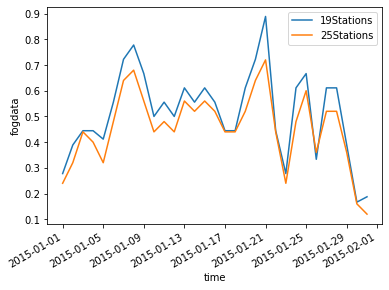

In [223]:
t.fog.sel(date=slice('2015-01-01','2015-1-31')).plot(label='19Stations')
y.sel(time=slice('2015-01-01','2015-1-31')).plot(label='25Stations')
#plt.hline(0.48)
plt.legend()

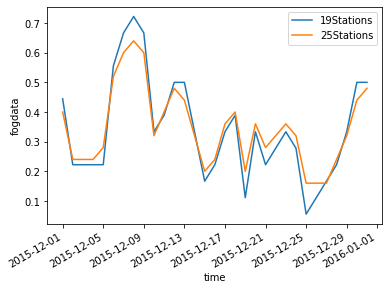

In [224]:
t.fog.sel(date=slice('2015-12-01','2015-12-31')).plot(label='19Stations')
y.sel(time=slice('2015-12-01','2015-12-31')).plot(label='25Stations')
plt.legend()

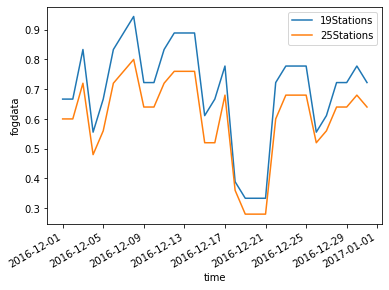

In [225]:
t.fog.sel(date=slice('2016-12-01','2016-12-31')).plot(label='19Stations')
y.sel(time=slice('2016-12-01','2016-12-31')).plot(label='25Stations')
plt.legend()

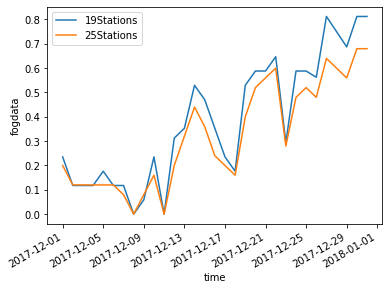

In [226]:
t.fog.sel(date=slice('2017-12-01','2017-12-31')).plot(label='19Stations')
y.sel(time=slice('2017-12-01','2017-12-31')).plot(label='25Stations')
plt.legend()

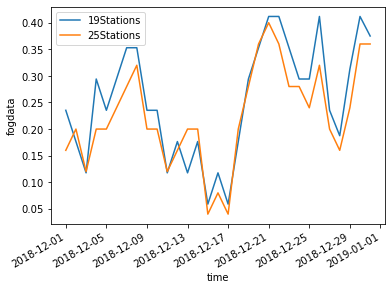

In [227]:
t.fog.sel(date=slice('2018-12-01','2018-12-31')).plot(label='19Stations')
y.sel(time=slice('2018-12-01','2018-12-31')).plot(label='25Stations')
plt.legend()

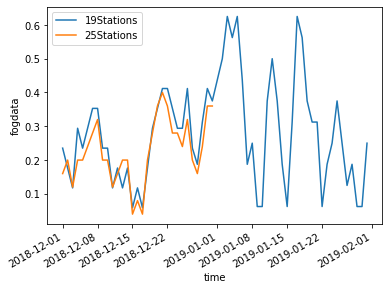

In [246]:
t.fog.sel(date=slice('2018-12-01','2019-1-31')).plot(label='19Stations')
y.sel(time=slice('2018-12-01','2019-1-31')).plot(label='25Stations')
plt.legend()

In [229]:
#Times=t.fog.sel(date=slice('2018-12-01','2019-1-31')).date


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<xarray.DataArray ()>
array(-7.00800078e-19)
<xarray.DataArray 'fog' (date: 62)>
array([0.23529412, 0.17647059, 0.11764706, 0.29411765, 0.23529412,
       0.29411765, 0.35294118, 0.35294118, 0.23529412, 0.23529412,
       0.11764706, 0.17647059, 0.11764706, 0.17647059, 0.05882353,
       0.11764706, 0.05882353, 0.17647059, 0.29411765, 0.35294118,
       0.41176471, 0.41176471, 0.35294118, 0.29411765, 0.29411765,
       0.41176471, 0.23529412, 0.1875    , 0.3125    , 0.41176471,
       0.375     , 0.4375    , 0.5       , 0.625     , 0.5625    ,
       0.625     , 0.4375    , 0.1875    , 0.25      , 0.0625    ,
       0.0625    , 0.375     , 0.5       , 0.375     , 0.1875    ,
       0.0625    , 0.3125    , 0.625     , 0.5625    , 0.375     ,
       0.3125    , 0.3125    , 0.0625    , 0.1875    , 0.25      ,
       0.375     , 0.25      , 0.125     , 0.1875    , 0.0625    ,
       0.0625    , 0.25      ])
Coordinates:
  * date     (date) datetime64[ns] 2018-12-01 2018-12-02 ... 2019-01-3

0.7608316197197968

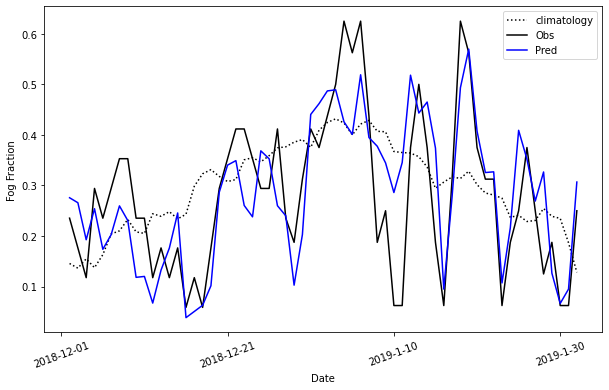

In [259]:
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#t.fog.sel(date=slice('2018-12-01','2019-1-31')).plot(label='19Stations')
#y.sel(time=slice('2018-12-01','2019-1-31')).plot(label='25Stations')
#predy.sel(time=slice('2018-12-01','2019-1-31')).plot(label='CNN')
plt.plot(x,OTs,label='climatology', color='black',linestyle='dotted')
plt.plot(x,t.fog.sel(date=slice('2018-12-01','2019-1-31')),label='Obs', color='black')
plt.plot(x,predy.sel(time=slice('2018-12-01','2019-1-31')),label='Pred', color='blue')
print(xr.corr(t.fog.sel(date=slice('2018-12-01','2019-1-31')),predy.sel(time=slice('2018-12-01','2019-1-31'))))
#OTs.plot()
plt.xticks([0, 20, 40,60], ['2018-12-01', '2018-12-21', '2019-1-10', '2019-1-30'],rotation=20)
plt.ylabel('Fog Fraction')
plt.xlabel('Date')
plt.legend()
plt.savefig('pred2018Dec-2019Jan.eps')
print(t.fog.sel(date=slice('2018-12-01','2019-1-31')))
print(predy.sel(time=slice('2018-12-01','2019-1-31')))

np.corrcoef(t.fog.sel(date=slice('2018-12-01','2019-1-31')),predy.sel(time=slice('2018-12-01','2019-1-31')))[0,1]


<xarray.DataArray ()>
array(1.45253172e-18)
<xarray.DataArray 'fog' (date: 62)>
array([0.23529412, 0.17647059, 0.11764706, 0.29411765, 0.23529412,
       0.29411765, 0.35294118, 0.35294118, 0.23529412, 0.23529412,
       0.11764706, 0.17647059, 0.11764706, 0.17647059, 0.05882353,
       0.11764706, 0.05882353, 0.17647059, 0.29411765, 0.35294118,
       0.41176471, 0.41176471, 0.35294118, 0.29411765, 0.29411765,
       0.41176471, 0.23529412, 0.1875    , 0.3125    , 0.41176471,
       0.375     , 0.4375    , 0.5       , 0.625     , 0.5625    ,
       0.625     , 0.4375    , 0.1875    , 0.25      , 0.0625    ,
       0.0625    , 0.375     , 0.5       , 0.375     , 0.1875    ,
       0.0625    , 0.3125    , 0.625     , 0.5625    , 0.375     ,
       0.3125    , 0.3125    , 0.0625    , 0.1875    , 0.25      ,
       0.375     , 0.25      , 0.125     , 0.1875    , 0.0625    ,
       0.0625    , 0.25      ])
Coordinates:
  * date     (date) datetime64[ns] 2018-12-01 2018-12-02 ... 2019-01-31

0.7256231566902575

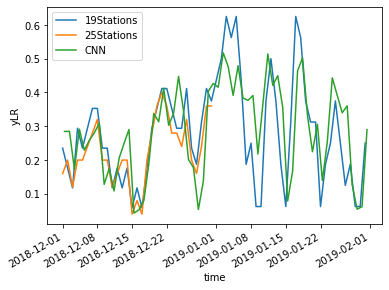

In [214]:
t.fog.sel(date=slice('2018-12-01','2019-1-31')).plot(label='19Stations')
y.sel(time=slice('2018-12-01','2019-1-31')).plot(label='25Stations')
predy.sel(time=slice('2018-12-01','2019-1-31')).plot(label='CNN')

print(xr.corr(t.fog.sel(date=slice('2018-12-01','2019-1-31')),predy.sel(time=slice('2018-12-01','2019-1-31'))))
#OTs.plot()
plt.legend()

print(t.fog.sel(date=slice('2018-12-01','2019-1-31')))
print(predy.sel(time=slice('2018-12-01','2019-1-31')))

np.corrcoef(t.fog.sel(date=slice('2018-12-01','2019-1-31')),predy.sel(time=slice('2018-12-01','2019-1-31')))[0,1]

<xarray.DataArray ()>
array(-7.45638514e-19)
<xarray.DataArray 'fog' (date: 62)>
array([0.15384615, 0.15384615, 0.        , 0.07692308, 0.30769231,
       0.23076923, 0.30769231, 0.15384615, 0.15384615, 0.38461538,
       0.38461538, 0.23076923, 0.09090909, 0.15384615, 0.30769231,
       0.46153846, 0.30769231, 0.30769231, 0.46153846, 0.53846154,
       0.69230769, 0.66666667, 0.66666667, 0.61538462, 0.76923077,
       0.69230769, 0.46153846, 0.69230769, 0.69230769, 0.61538462,
       0.91666667, 0.375     , 0.5       , 0.5       , 0.66666667,
       0.3       , 0.22222222, 0.42857143, 0.625     , 0.55555556,
       0.7       , 0.44444444, 0.5       , 0.875     , 0.77777778,
       0.77777778, 0.5       , 0.6       , 0.6       , 0.6       ,
       0.9       , 0.6       , 0.9       , 0.3       , 0.        ,
       0.3       , 0.4       , 0.4       , 0.14285714, 0.125     ,
       0.4       , 0.5       ])
Coordinates:
  * date     (date) datetime64[ns] 2019-12-01 2019-12-02 ... 2020-01-3

0.88702696258186

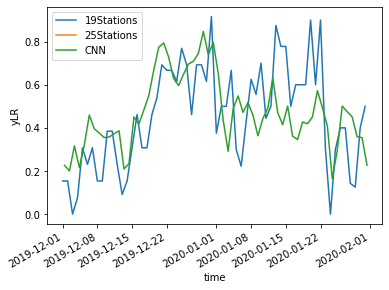

In [237]:
t.fog.sel(date=slice('2019-12-01','2020-1-31')).plot(label='19Stations')
y.sel(time=slice('2019-12-01','2020-1-31')).plot(label='25Stations')
predy.sel(time=slice('2019-12-01','2020-1-31')).plot(label='CNN')

print(xr.corr(t.fog.sel(date=slice('2019-12-01','2020-1-31')),predy.sel(time=slice('2019-12-01','2020-1-31'))))
#OTs.plot()
plt.legend()

print(t.fog.sel(date=slice('2019-12-01','2020-1-31')))
print(predy.sel(time=slice('2019-12-01','2020-1-31')))
np.corrcoef(t.fog.sel(date=slice('2019-12-01','2019-12-31')),predy.sel(time=slice('2019-12-01','2019-12-31')))[0,1]

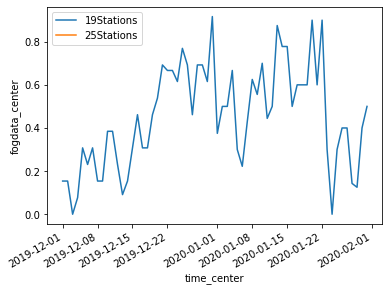

In [173]:
t.fog.sel(date=slice('2019-12-01','2020-1-31')).plot(label='19Stations')
y.sel(time=slice('2019-12-01','2020-1-31')).plot(label='25Stations')
#OTs.plot()
plt.legend()